In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np

In [14]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
iris_N = 150

#column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "target"]
#iris_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', names=column_names)

#data = iris_df.iloc[:, 0:4]
#target = iris_df.iloc[:, 4]

In [15]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [16]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [17]:
#iris_df["target"].plot.hist()
iris_df["target"]

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
6      0.0
7      0.0
8      0.0
9      0.0
10     0.0
11     0.0
12     0.0
13     0.0
14     0.0
15     0.0
16     0.0
17     0.0
18     0.0
19     0.0
20     0.0
21     0.0
22     0.0
23     0.0
24     0.0
25     0.0
26     0.0
27     0.0
28     0.0
29     0.0
      ... 
120    2.0
121    2.0
122    2.0
123    2.0
124    2.0
125    2.0
126    2.0
127    2.0
128    2.0
129    2.0
130    2.0
131    2.0
132    2.0
133    2.0
134    2.0
135    2.0
136    2.0
137    2.0
138    2.0
139    2.0
140    2.0
141    2.0
142    2.0
143    2.0
144    2.0
145    2.0
146    2.0
147    2.0
148    2.0
149    2.0
Name: target, Length: 150, dtype: float64

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3)
x_train = iris.data
y_train = iris.target

150


/home/romgrelier/Documents/Ecole/master info - Semestre 2/Apprentissage Artificielle/classifier_comparison/env/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


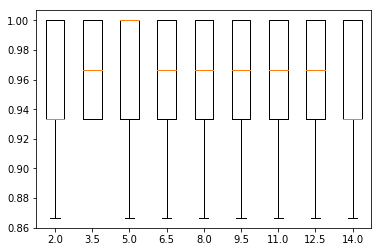

In [20]:
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

clfs = {}
score_record = []
leaf_count = []
print(iris_N)
for i in np.arange(2, iris_N * 0.1, (iris_N * 0.1)/10):
    clfs[f"Decision Tree min_samples_leaf={int(i)}"] = tree.DecisionTreeClassifier(min_samples_leaf=int(i))
    leaf_count.append(i)

for name, clf in clfs.items():
    scores = cross_val_score(clf, x_train, y_train, cv=10)
    score_record.append(scores)

fig = plt.figure()
plt.boxplot(score_record)
ax = fig.add_subplot(111)
ax.set_xticklabels(leaf_count)
plt.show()

    #predict_proba = model.predict_proba(x_test)
    #fpr, tpr, thresholds = metrics.roc_curve(y_test, predict_proba[:, 1], pos_label=1)
    #auc = metrics.auc(fpr, tpr)
    #print("{} : {}".format(name, auc))
    #plt.plot(fpr, tpr, label=name)
    #plt.legend()
    #scores = cross_val_score(clf, iris.data, iris.target, cv=10)

In [ ]:
results = {}

for name, clf in clfs.items():
    results[name] = []
    for i in range(len(accuracy_record)):
        results[name].append(i)

results_df = pd.DataFrame(data=results)